In [1]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [2]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [4]:
#Checking for null values

df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [5]:
#Only one row with missing data. Droping that data point

df = df.dropna(axis = 0)

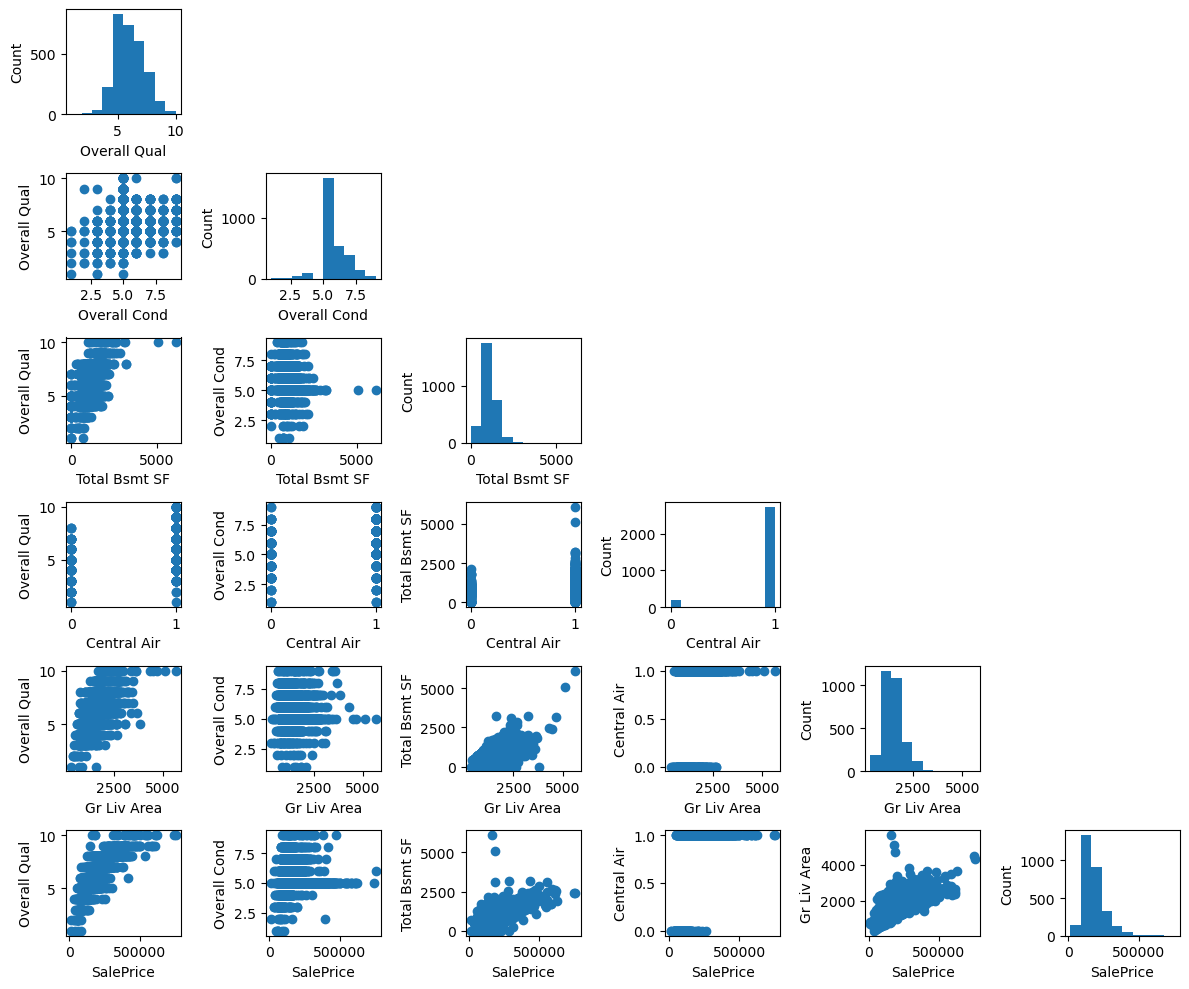

In [7]:
import matplotlib.pyplot as plt

from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values, names = df.columns, figsize = (12, 10))
plt.tight_layout()
plt.show()

In [9]:
#Correlation matrix

print(df.corr())

               Overall Qual  Overall Cond  Total Bsmt SF  Central Air  \
Overall Qual       1.000000     -0.094219       0.547294     0.287443   
Overall Cond      -0.094219      1.000000      -0.173344     0.119611   
Total Bsmt SF      0.547294     -0.173344       1.000000     0.218726   
Central Air        0.287443      0.119611       0.218726     1.000000   
Gr Liv Area        0.570304     -0.115176       0.444675     0.123358   
SalePrice          0.799138     -0.101191       0.632280     0.264700   

               Gr Liv Area  SalePrice  
Overall Qual      0.570304   0.799138  
Overall Cond     -0.115176  -0.101191  
Total Bsmt SF     0.444675   0.632280  
Central Air       0.123358   0.264700  
Gr Liv Area       1.000000   0.706628  
SalePrice         0.706628   1.000000  


In [10]:
# Overall Qual, Gr Living Area, Total Basement SD

In [12]:
from sklearn.model_selection import train_test_split

X = df['Gr Liv Area'].values
y = df['SalePrice'].values



In [17]:
X = X.reshape(-1, 1)

y = y.reshape(-1, 1)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Xstd = StandardScaler().fit_transform(X)
ystd = StandardScaler().fit_transform(y)


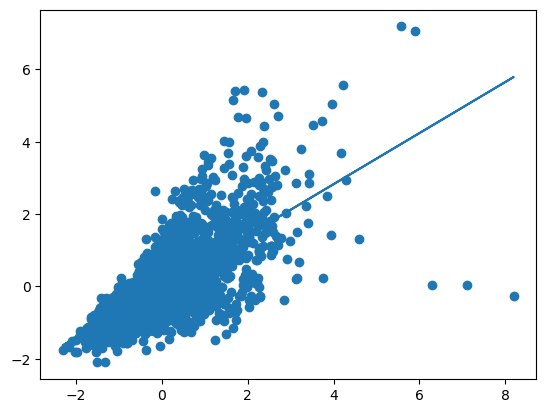

In [23]:
Lr1 = LinearRegression().fit(Xstd, ystd)
plt.scatter(Xstd, ystd)
plt.plot(Xstd, Lr1.predict(Xstd))

In [26]:
#RANSAC (Random Sample Consenses)

# Fits a model to the subset of the data, the so called inliers

from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                        max_trials = 100,
                        min_samples = 0.95,
                        residual_threshold=None,
                        random_state = 123)

ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

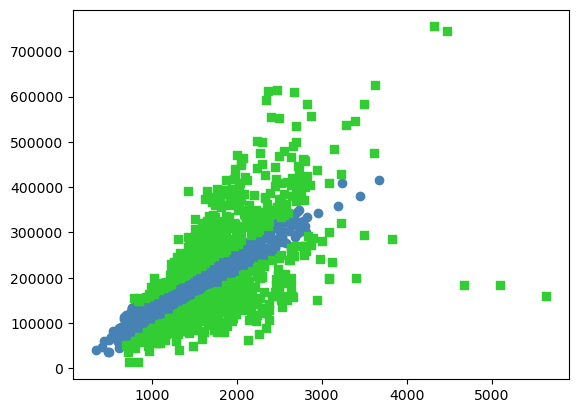

In [27]:
inlierMask = ransac.inlier_mask_
outlierMask = np.logical_not(inlierMask)

lineX = np.arange(3, 10, 1)
lineYRansac = ransac.predict(lineX[:, np.newaxis])

plt.scatter(X[inlierMask], y[inlierMask], c = 'steelblue', marker = 'o')
plt.scatter(X[outlierMask], y[outlierMask], c = 'limegreen', marker = 's')

In [28]:
#residual_threshold was None, so the default is Median Absolute Deviation
    
np.median(np.abs(y - np.median(y)))

37000.0

In [29]:
from sklearn.model_selection import train_test_split

features = df.columns[df.columns != 'SalePrice']

X = df[features].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 124)

slr = LinearRegression()

slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

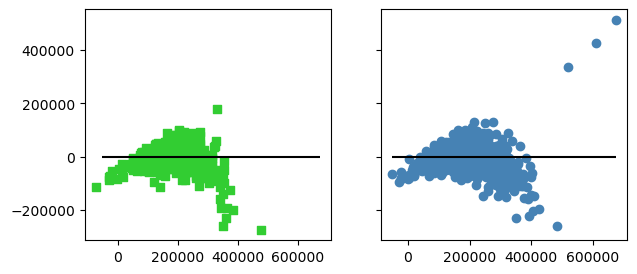

In [32]:
xMax = np.max([np.max(y_train_pred), np.max(y_train_pred)])
xMin = np.min([np.min(y_train_pred), np.min(y_train_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3), sharey=True)


ax1.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker = 's')
ax2.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker = 'o')

ax1.hlines(y = 0, xmin = xMin-100, xmax = xMax + 100, color = 'black')
ax2.hlines(y = 0, xmin = xMin-100, xmax = xMax + 100, color = 'black')

In [33]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
print(train_r2)

0.7564743160218871


In [34]:
# Ridge Regression
# L2 penalized model, add the squared sum of the weights to the MSE loss function multiplied by lambda. 
# By increasing lambda, we increase the effect of the squared sum of the weights

# Lasso -> add a penalty term -> sum of absolutes of magnitudes of weights

# Elastic Net -> add Ridge's and lasso's penalty term



from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge = Ridge(alpha = 1.0)
lasso = Lasso(alpha = 1.0)
ENet = ElasticNet(alpha = 1.0, l1_ratio=0.5)

In [43]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

In [45]:
from sklearn.preprocessing import PolynomialFeatures

regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

Xquad = quadratic.fit_transform(X)
Xcubic = cubic.fit_transform(X)

Xfit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(Xfit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(Xquad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(Xfit))
quad_r2 = r2_score(y, regr.predict(Xquad))

regr = regr.fit(Xcubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(Xfit))
cubic_r2 = r2_score(y, regr.predict(Xcubic))

print(linear_r2, quad_r2, cubic_r2)




0.5174078398002504 0.5176057493005759 0.5177387391663926


In [46]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values

regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

Xquad = quadratic.fit_transform(X)
Xcubic = cubic.fit_transform(X)

Xfit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(Xfit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(Xquad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(Xfit))
quad_r2 = r2_score(y, regr.predict(Xquad))

regr = regr.fit(Xcubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(Xfit))
cubic_r2 = r2_score(y, regr.predict(Xcubic))

print(linear_r2, quad_r2, cubic_r2)


0.6386216382995367 0.6927823564507078 0.6997332379865049


In [41]:
Xfit[:, np.newaxis].shape

(3489, 1)

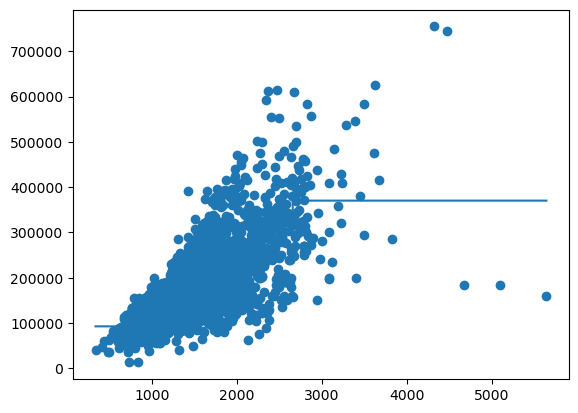

In [52]:
from sklearn.tree import DecisionTreeRegressor

X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

tree = DecisionTreeRegressor(max_depth=3)

tree.fit(X, y)

sortIdc = X.flatten().argsort()

#argsort returns indices that sorts the array

plt.scatter(X[sortIdc], y[sortIdc])
plt.plot(X[sortIdc], tree.predict(X[sortIdc]))


In [66]:

np.sort(X)


array([[1656],
       [ 896],
       [1329],
       ...,
       [ 970],
       [1389],
       [2000]])

In [67]:
X[X.flatten().argsort()]

array([[ 334],
       [ 407],
       [ 438],
       ...,
       [4676],
       [5095],
       [5642]])

In [72]:
y_pred = tree.predict(X)

In [56]:
X.flatten().shape

(2929,)